In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

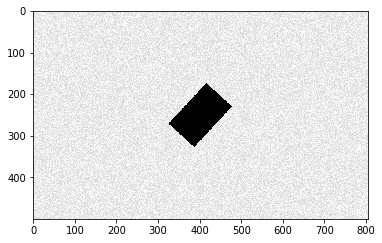

In [216]:
w, h = 500, int(500*1.61)
imageOriginal = np.ones((w,h), dtype=np.uint8)*200 + np.random.rand(w,h)*40
l1, l2 = int(h/6), int(w/6)
x, y = int(h/2 + l1/2), int(w/2 + l2/2)

box = np.array([[x-l1, y-l2], [x-l1,y], [x, y], [x, y-l2]])
origin = np.array([x - int(l1/2), y - int(l2/2)])

angle = 47 * np.pi / 180
c, s = np.cos(angle), np.sin(angle)
rot = np.array([[c, -s], [s, c]])
box -= origin
box = box.dot(rot).astype(np.int)
box += origin

imageOriginal = cv.drawContours(imageOriginal,[box],0,(0,191,255), -1).astype(np.uint8)

plt.imshow(imageOriginal, cmap='gray')

image = imageOriginal.copy()


[431, 355, 370, 446] [277, 297, 220, 200]
-1
-46.82796824430501


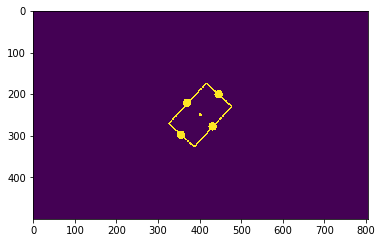

In [217]:

bricks = (image < 20).astype(np.uint8)
_, contours, hierarchy = cv.findContours(bricks, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

drawonme = np.zeros(bricks.shape, dtype=np.uint8)
cv.drawContours(drawonme, contours, -1, (255, 255, 255), thickness=2)

for contour in contours:
    M = cv.moments(contour)
    if M['m00'] == 0:
        break
    X = int(M['m10'] / M['m00'])
    Y = int(M['m01'] / M['m00'])
    
    drawonme = cv.circle(drawonme, (X, Y), 4, 255, -1)
    
    rect = cv.minAreaRect(contour)
    (x, y), (w, h), angle = rect

    box = cv.boxPoints(rect)
    box = np.int0(box)

    # Find midpoints:
    midX = [np.int0((box[i - 1, 0] + box[i, 0])/2) for i in range(4)]
    midY = [np.int0((box[i - 1, 1] + box[i, 1])/2) for i in range(4)]
    for x, y in zip(midX, midY):
        drawonme = cv.circle(drawonme, (x, y), 10, 255, -1)
    print(midX, midY)
    
    # Find longest side:
    candidates = np.sqrt(np.array([(midX[i]-midX[j])**2 + (midY[i]-midY[j])**2 for i,j in zip([0,1],[2,3])]))
    longest_side = candidates.argmax()
    sign = np.sign(midX[longest_side+2] - midX[longest_side] + midY[longest_side+2] - midY[longest_side])
    print(sign)
    
    # Find angle:
    pts = np.array([[midX[i], midY[i]] for i in longest_side + [0,2]])
    angle = sign*np.arccos(np.abs(pts[1] - pts[0]).dot(np.array([1,0]))/np.linalg.norm(pts[1] - pts[0])) * 180 / np.pi
    print(angle)
    
plt.imshow(drawonme)

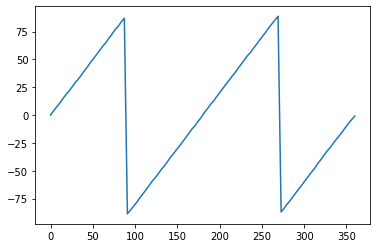

In [254]:
def makeImage(angle):
    w, h = 500, int(500*1.61)
    imageOriginal = np.ones((w,h), dtype=np.uint8)*200 + np.random.rand(w,h)*40
    l1, l2 = int(h/6), int(w/6)
    x, y = int(h/2 + l1/2), int(w/2 + l2/2)

    box = np.array([[x-l1, y-l2], [x-l1,y], [x, y], [x, y-l2]])
    origin = np.array([x - int(l1/2), y - int(l2/2)])

    angle = angle * np.pi / 180
    c, s = np.cos(angle), np.sin(angle)
    rot = np.array([[c, -s], [s, c]])
    box -= origin
    box = box.dot(rot).astype(np.int)
    box += origin

    return cv.drawContours(imageOriginal,[box],0,(0,191,255), -1).astype(np.uint8)


def findAngle(image):
    bricks = (image < 20).astype(np.uint8)
    _, contours, hierarchy = cv.findContours(bricks, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    drawonme = np.zeros(bricks.shape, dtype=np.uint8)
    cv.drawContours(drawonme, contours, -1, (255, 255, 255), thickness=2)

    for contour in contours:
        M = cv.moments(contour)
        if M['m00'] == 0:
            break
        X = int(M['m10'] / M['m00'])
        Y = int(M['m01'] / M['m00'])

        drawonme = cv.circle(drawonme, (X, Y), 4, 255, -1)

        rect = cv.minAreaRect(contour)
        (x, y), (w, h), angle = rect

        box = cv.boxPoints(rect)
        box = np.int0(box)

        # Find midpoints:
        midX = [np.int0((box[i - 1, 0] + box[i, 0])/2) for i in range(4)]
        midY = [np.int0((box[i - 1, 1] + box[i, 1])/2) for i in range(4)]
        for x, y in zip(midX, midY):
            drawonme = cv.circle(drawonme, (x, y), 10, 255, -1)

        # Find longest side:
        candidates = np.sqrt(np.array([(midX[i]-midX[j])**2 + (midY[i]-midY[j])**2 for i,j in zip([0,1],[2,3])]))
        longest_side = candidates.argmax()
        sign = np.sign(midX[longest_side+2] - midX[longest_side])

        # Find angle:
        pts = np.array([[midX[i], midY[i]] for i in longest_side + [0,2]])
        angle = sign*np.arccos(np.abs(pts[1] - pts[0]).dot(np.array([1,0]))/np.linalg.norm(pts[0] - pts[1]))
        angle = angle * 180 / np.pi
#         if angle < 0:
#             angle = - angle
    return angle
        
angles = np.linspace(0,360,100)
foundangles = np.zeros((100,1))
for i in range(100):
    foundangles[i] = findAngle(makeImage(angles[i]))
    
plt.plot(angles, foundangles)

In [237]:
np.cos(2*np.pi)
np.arccos(np.sqrt(2)/2)


0.7853981633974483

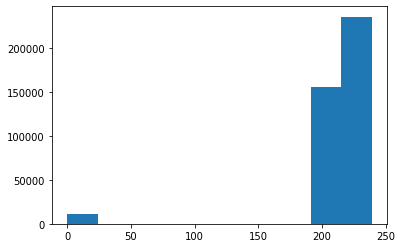

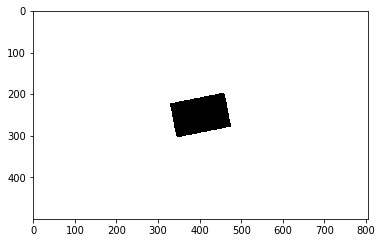

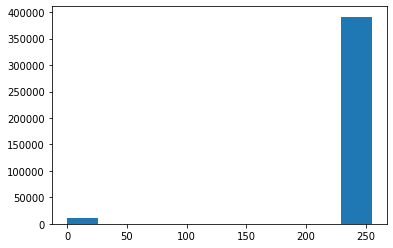

[  0 255]


In [93]:
# Normalise and treat image:
# image = cv.normalize(image, 255)
plt.hist(image.flatten())
plt.show()

blur = cv.GaussianBlur(image,(5,5),0)
ret3, image = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(image, cmap='gray')
plt.show()

plt.hist(image.flatten())
plt.show()
print(np.unique(image))